In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
data=pd.read_csv('Fraud.csv')

In [19]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [21]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [22]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [23]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [24]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [25]:
data.nameOrig.value_counts()

C1784010646    3
C1677795071    3
C2051359467    3
C545315117     3
C1065307291    3
              ..
C44721395      1
C1490262788    1
C687457395     1
C1588387242    1
C1341964385    1
Name: nameOrig, Length: 6353307, dtype: int64

In [26]:
data.shape

(6362620, 11)

# Exploratory Data Analysis

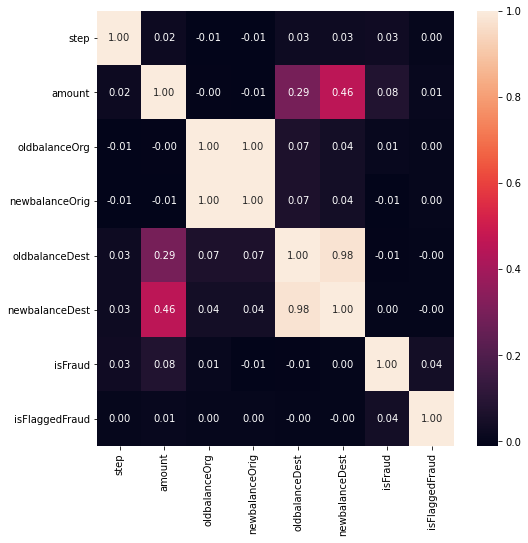

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True, fmt='.2f')
plt.show()

C:\Users\CHAITRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

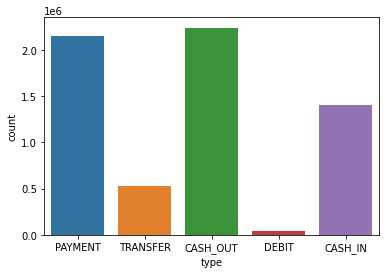

In [28]:
sns.countplot("type",data =data)

C:\Users\CHAITRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

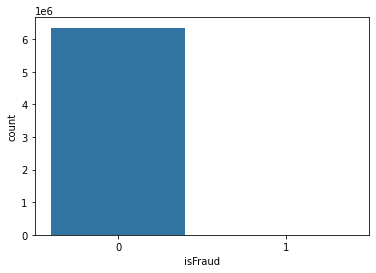

In [29]:
sns.countplot("isFraud",data =data)

From above graph we can see that the data given to us is highly imbalanced so we need to balance it using undersampling or oversampling technique.

C:\Users\CHAITRA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


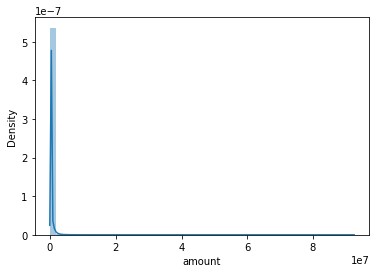

In [30]:
plot1=sns.distplot(data['amount'])

C:\Users\CHAITRA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


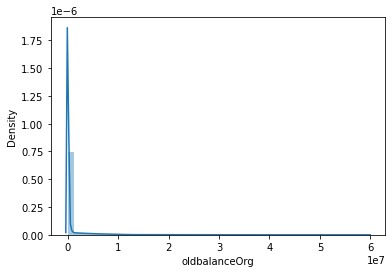

In [31]:
plot2=sns.distplot(data['oldbalanceOrg'])

C:\Users\CHAITRA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


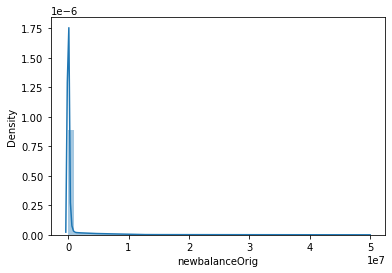

In [32]:
plot3=sns.distplot(data['newbalanceOrig'])

C:\Users\CHAITRA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


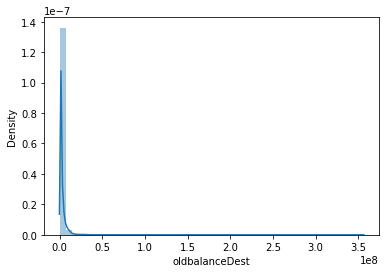

In [33]:
plot4=sns.distplot(data['oldbalanceDest'])

C:\Users\CHAITRA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


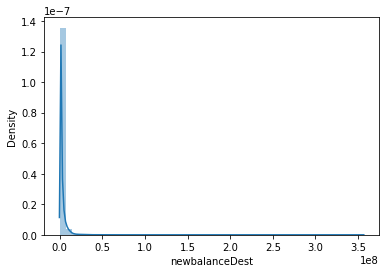

In [34]:
plot5=sns.distplot(data['newbalanceDest'])

# From above graphs we can see the features are not normally distributed so we need to normalize them using normalizer.

In [35]:
def salary_category(x):
    if x>=74871.94:
        return('HIGH')
    elif x<74871.94 and x>=13389.57:
        return('MODERATE')
    elif x<13389.57:
        return('LOW')
    else:
        return("EXTREMLY LOW")
data['transfer_amount_category']= data.amount.apply(salary_category) 

Defining the new feature transfer amount category using the definition

In [36]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transfer_amount_category
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,LOW
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,LOW
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,LOW
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,LOW
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,LOW


# Data Preprocessing and cleaning

In [37]:
from sklearn import preprocessing   
label_encoder = preprocessing.LabelEncoder() 

In [38]:
data['type_encode']= label_encoder.fit_transform(data['type']) 
data['nameOrig_encode']= label_encoder.fit_transform(data['nameOrig']) 
data['nameDest_encode']= label_encoder.fit_transform(data['nameDest']) 
data['transfer_amount_category_encode']= label_encoder.fit_transform(data['transfer_amount_category']) 

Applying label encoding to categorical features

In [39]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

amount_scale = normalizer.fit_transform(data.amount.values.reshape(1,-1))
data['amount_norm'] = amount_scale.reshape(-1,1)
amount_oldbalanceOrg = normalizer.fit_transform(data.oldbalanceOrg.values.reshape(1,-1))
data['oldbalanceOrg_norm'] = amount_oldbalanceOrg.reshape(-1,1)
amount_newbalanceOrig = normalizer.fit_transform(data.newbalanceOrig.values.reshape(1,-1))
data['newbalanceOrig_norm'] = amount_newbalanceOrig.reshape(-1,1)
amount_oldbalanceDest= normalizer.fit_transform(data.oldbalanceDest.values.reshape(1,-1))
data['oldbalanceDest_norm'] = amount_oldbalanceDest.reshape(-1,1)
amount_newbalanceDest = normalizer.fit_transform(data.newbalanceDest.values.reshape(1,-1))
data['newbalanceDest_norm'] = amount_newbalanceDest.reshape(-1,1)

Normalizing the required features as data is not normally distributed

In [40]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [41]:
data_majority = data[data.isFraud == 0]
data_minority = data[data.isFraud == 1]

In [42]:
# Balancing data
from sklearn.utils import resample
data_minority_upsampled = resample(data_minority,
                                 replace=True,
                                 n_samples=6354407,
                                 random_state=123)

In [43]:
data_upsampled = pd.concat([data_majority,data_minority_upsampled])
data_upsampled.isFraud.value_counts()

1    6354407
0    6354407
Name: isFraud, dtype: int64

In [44]:
X = data_upsampled.loc[:,['type_encode','nameOrig_encode','nameDest_encode','transfer_amount_category_encode','amount_norm','oldbalanceOrg_norm','newbalanceOrig_norm','oldbalanceDest_norm','newbalanceDest_norm','isFlaggedFraud']]


In [45]:
y=data_upsampled.isFraud

In [46]:
X

,type_encode,nameOrig_encode,nameDest_encode,transfer_amount_category_encode,amount_norm,oldbalanceOrg_norm,newbalanceOrig_norm,oldbalanceDest_norm,newbalanceDest_norm,isFlaggedFraud
0,3,757869,1662094,1,0.000006,0.000022,0.000021,0.000000,0.000000,0
1,3,2188998,1733924,1,0.000001,0.000003,0.000003,0.000000,0.000000,0
4,3,3445981,828919,1,0.000007,0.000005,0.000004,0.000000,0.000000,0
5,3,6026525,2247218,1,0.000005,0.000007,0.000006,0.000000,0.000000,0
6,3,1805947,2063363,1,0.000004,0.000024,0.000023,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
1059593,1,439482,248569,0,0.000069,0.000015,0.000000,0.000463,0.000439,0
3198627,1,561218,11810,2,0.000035,0.000007,0.000000,0.000045,0.000047,0
1511375,1,3477444,103859,0,0.000162,0.000034,0.000000,0.000027,0.000051,0
6183492,1,2403879,13649,0,0.000110,0.000023,0.000000,0.000304,0.000298,0


In [47]:
y

0          0
1          0
4          0
5          0
6          0
          ..
1059593    1
3198627    1
1511375    1
6183492    1
1611550    1
Name: isFraud, Length: 12708814, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2)

In [60]:
# checking accuracy with different models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_hat1 = model1.predict(X_test)

In [54]:
accuracy_score(y_test,y_hat1)

0.5919947224037235

In [55]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='gini')
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
y_hat2 = model2.predict(X_test)

In [57]:
accuracy_score(y_test,y_hat2)

0.9998300392420506

In [58]:
confusion_matrix(y_test,y_hat2)

array([[1585985,     540],
       [      0, 1590679]], dtype=int64)

In [61]:
print(classification_report(y_test,y_hat2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1586525
           1       1.00      1.00      1.00   1590679

    accuracy                           1.00   3177204
   macro avg       1.00      1.00      1.00   3177204
weighted avg       1.00      1.00      1.00   3177204



# From the above model i conclude that i got 99.9% accuracy for Decision tree classifier without Overfitting as we can see from Classification Report and Confusion Matrix.